# transaction_new

#### 라이브러리

In [4]:
# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
plt.rc('font', family='NanumSquareNeo/TTF')
import seaborn as sns
from datetime import datetime

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

import re

#### 필요함수 구현

In [5]:
# 데이터타입 변환
def columns_datetype_change(data,columns, datetype):
    data[columns] = data[columns].astype(datetype)
    if datetype == 'datetime64':
        data[columns] = data[columns].apply(lambda x: datetime.strftime(x, '%Y-%m-%d %H:%M:%S')).astype('datetime64[ns]')

# 결측값 확인
def null_check(data):
    return (data.isnull().sum() / data.shape[0]) * 100

# 데이터 info
def data_info(data):
    display(data.head(5),data.info())

# 정수형, 실수형을 제외한 나머지 데이터타입의 유니크값
def colmuns_unique(data):
    for c in data.columns:
        if data[c].dtype not in ['int64', 'float64']:
            print(f'------------{c}------------')
            print(data[f'{c}'].unique())
            
def memory_small(data):
    for c in data.columns:
        if data[c].dtype == 'int64':
            data[c] = data[c].astype('int32')
        elif data[c].dtype == 'object' and data[c].nunique()<10:
            data[c] = data[c].astype('category')
        

#### 데이터 불러오기

In [6]:
transaction_new =  pd.read_csv('data_file/transaction_new.csv')

#### transaction_new 분석

In [7]:
data_info(transaction_new)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.23,111.97,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.01,107.80,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.58,115.74,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.60,120.36,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.60,120.36,198753,55220,1,198753


None

In [8]:
# 데이터타입 변환  
columns_datetype_change(transaction_new,'created_at','datetime64')
columns_datetype_change(transaction_new,'shipment_date_limit','datetime64')

In [9]:
# 결측치확인
null_check(transaction_new)

created_at                0.00
customer_id               0.00
booking_id                0.00
session_id                0.00
payment_method            0.00
payment_status            0.00
promo_amount              0.00
promo_code               61.65
shipment_fee              0.00
shipment_date_limit       0.00
shipment_location_lat     0.00
shipment_location_long    0.00
total_amount              0.00
product_id                0.00
quantity                  0.00
item_price                0.00
dtype: float64

In [10]:
transaction_new.loc[transaction_new['promo_code'].isnull(),'promo_code']='Nopromo'

In [11]:
# 메모리 최적화
memory_small(transaction_new)

🅱️ 현재 promo_code 결측치 핸들링하는데, 현재 총합에서 (수량 * 제품값 + 배송비 - 할인가)를 뺐을때 값이 맞지 않다.
결론적으로 같은 날짜, 시간에 주문한 고객의 값이 합산되어 각 행에 입력되어 있다. 
아래 내용을 보면 수량x제품가격의 합을 모두 합산하고 배송비 10000원 더해주면 총합이 나온다.

🅱️ 회의를 통해 해당 데이터의 nan값을 대체하거나 삭제하지 않고 그대로 진행.


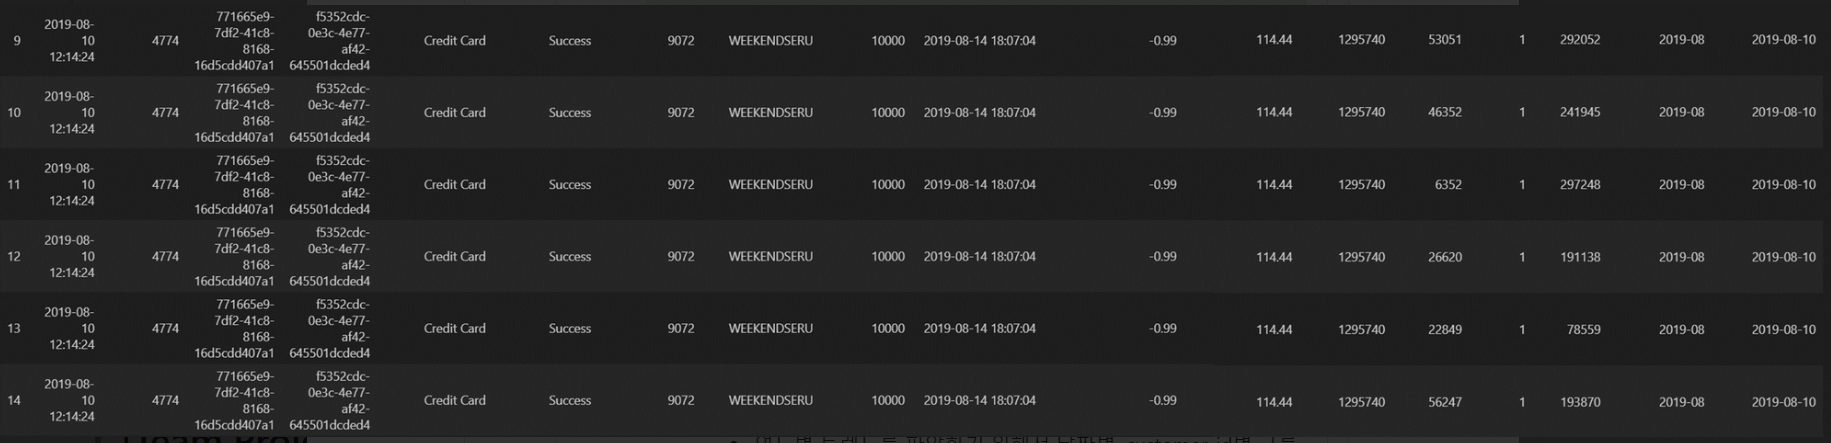

#### created_at  

In [8]:
transaction_new.created_at.dt.year.unique()

array([2018, 2019, 2020, 2021, 2022, 2017, 2016], dtype=int64)

<AxesSubplot:xlabel='created_at'>

findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


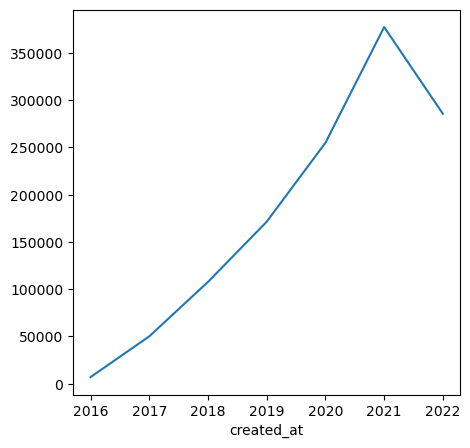

In [9]:
plt.subplots(figsize=(5,5))
transaction_new.groupby(transaction_new.created_at.dt.year).count()['session_id'].plot.line()

In [99]:
# yyyy-mm-dd형식으로 변경.
transaction_new['created_at_new2'] = transaction_new['created_at'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d')).astype('datetime64')

<AxesSubplot:xlabel='created_at_new2,created_at_new2'>

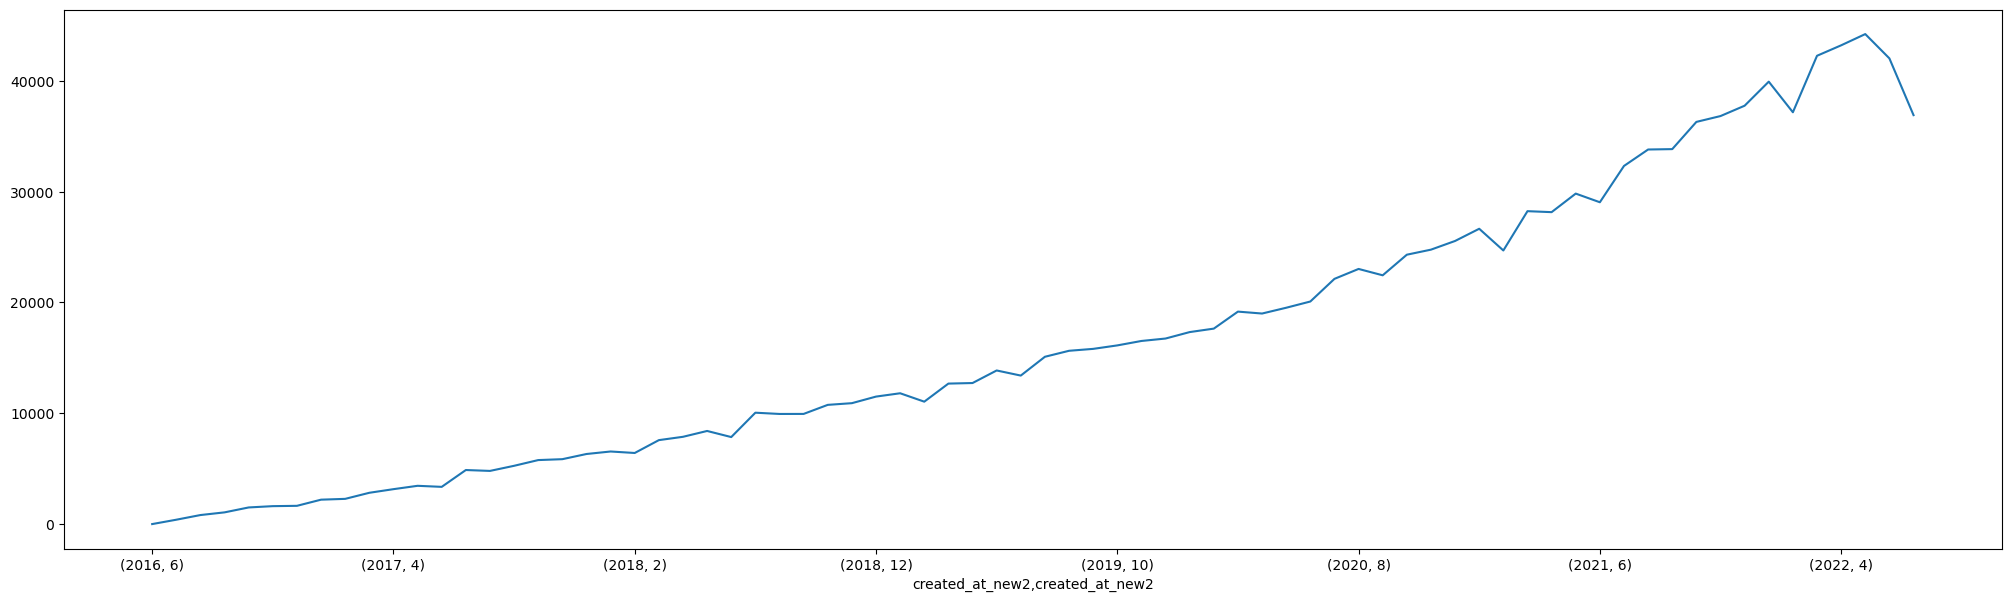

In [15]:
plt.subplots(figsize=(25,7))
col = transaction_new['created_at_new2'].dt
transaction_new_year = transaction_new.groupby([col.year, col.month])['customer_id'].count()
transaction_new_year.plot.line()

In [50]:
# shipment_date_limit - created_at (배송제한 날짜 - 주문날짜 = 배송기간)
transaction_new['shipment_period'] = (transaction_new['shipment_date_limit']-transaction_new['created_at']).dt.days

🅱️ 연도별로 주문량을 파악했을땐 2021년에 감소한다. 하지만 이건 2022년은 1-7월 주문량만 있고 2021년 주문량이 더 많기 때문에 당연히 감소하는 현상이다.   
🅱️ 연도별, 월별로 파악했을땐 월마다 하락되는 구간이 있다.

#### payment_method

<AxesSubplot:xlabel='promo_code', ylabel='count'>

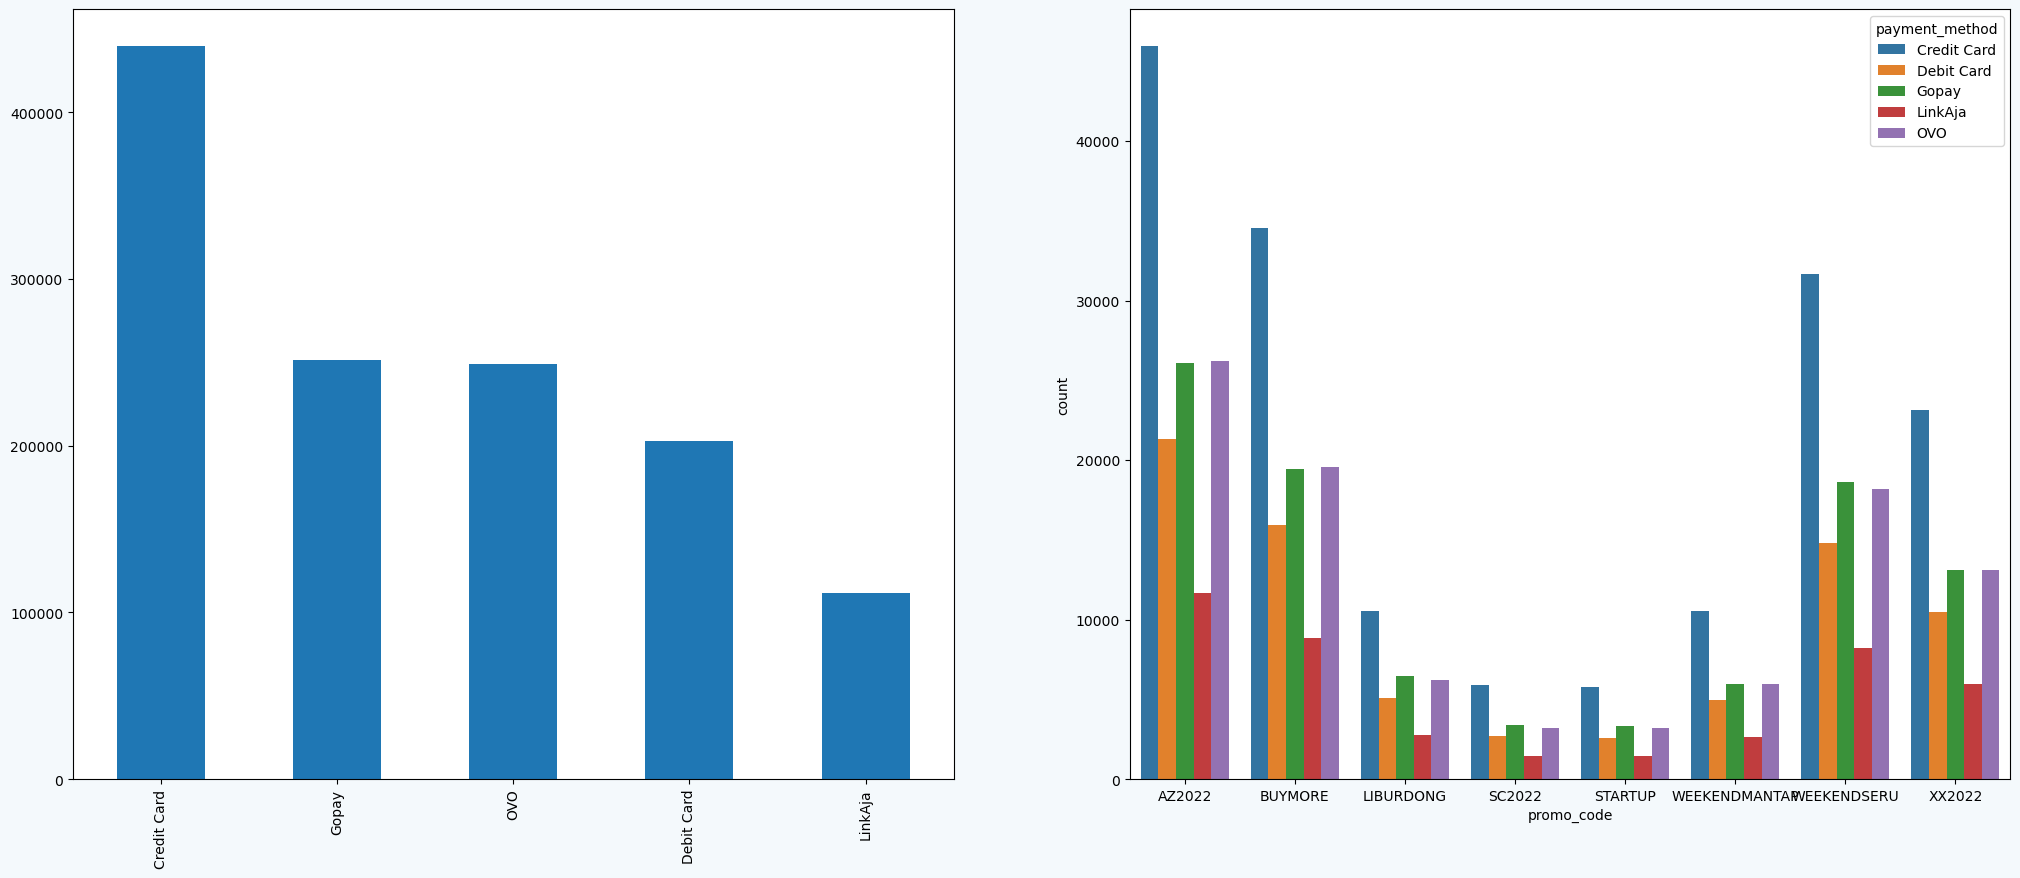

In [17]:
fig, axes = plt.subplots(1,2, figsize=(25, 10), facecolor='#F4F9FC')

# 지불방식 분포
transaction_new.payment_method.value_counts().plot.bar(ax=axes[0])

# 프로모션별 지불방식 분포
sns.countplot(data=transaction_new, x='promo_code', hue='payment_method',ax=axes[1])

🅱️ 결제방식은 신용카드가 가장 많다.
🅱️ 프로모션별 결제방식은 모든 같은 추이다. 신용카드가 가장 많다.

#### payment_status

Success   0.96
Failed    0.04
Name: payment_status, dtype: float64


<AxesSubplot:xlabel='promo_code', ylabel='count'>

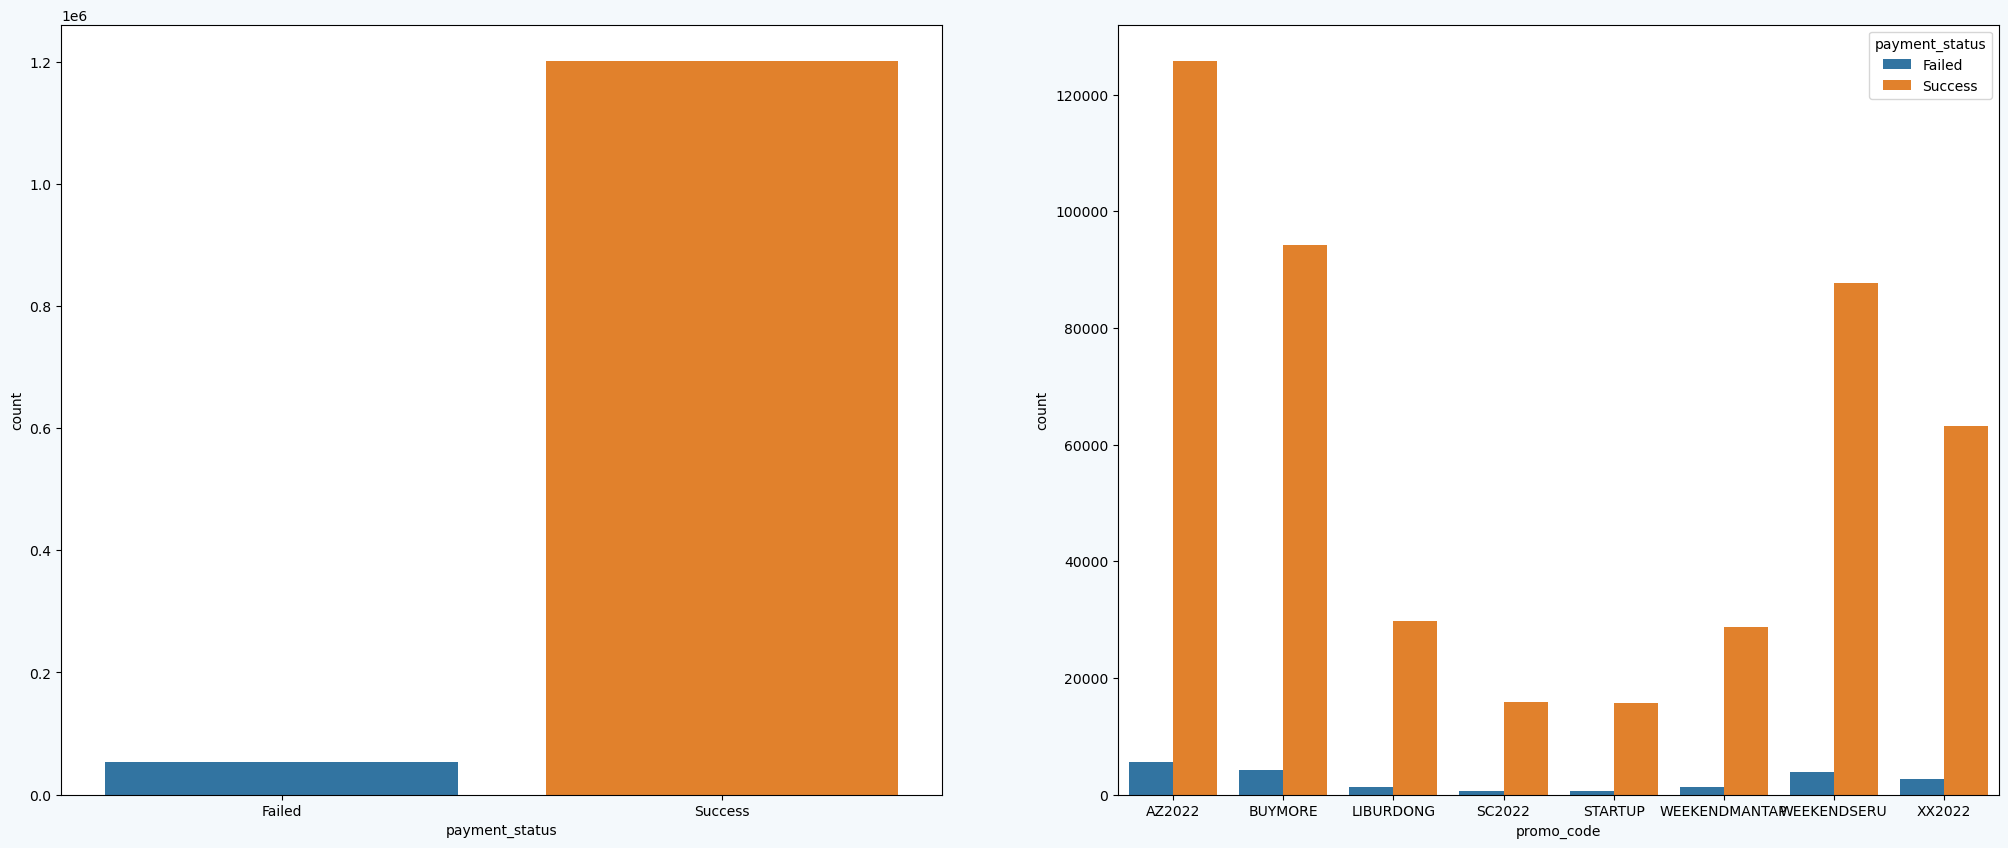

In [19]:
fig, axes = plt.subplots(1,2, figsize=(25, 10), facecolor='#F4F9FC')

# 결제성공여부
sns.countplot(x='payment_status',data=transaction_new, ax=axes[0])

# 결제성공비율
print(transaction_new.payment_status.value_counts(normalize=True))

# 프로모션별 분포
sns.countplot(x='promo_code',data=transaction_new, hue='payment_status',ax=axes[1])

🅱️ 결제성공여부는 96%가 성공 나머지 4%는 실패이다. 실패이유를 알아봐야겠다.   
🅱️ 프로모션별 결제성공여부에서도 같은 추이가 보인다.

#### promo_code

<AxesSubplot:>

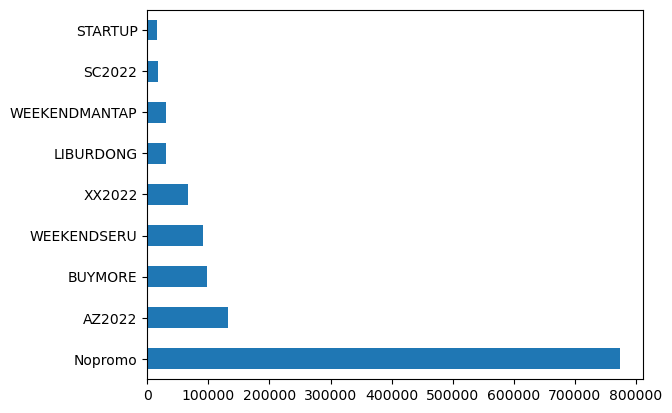

In [36]:
transaction_new.promo_code.value_counts().plot.barh()

🅱️ promo_code를 적용하지 않은 경우가 훨씬 많다.

#### shipment_fee

<AxesSubplot:xlabel='shipment_fee'>

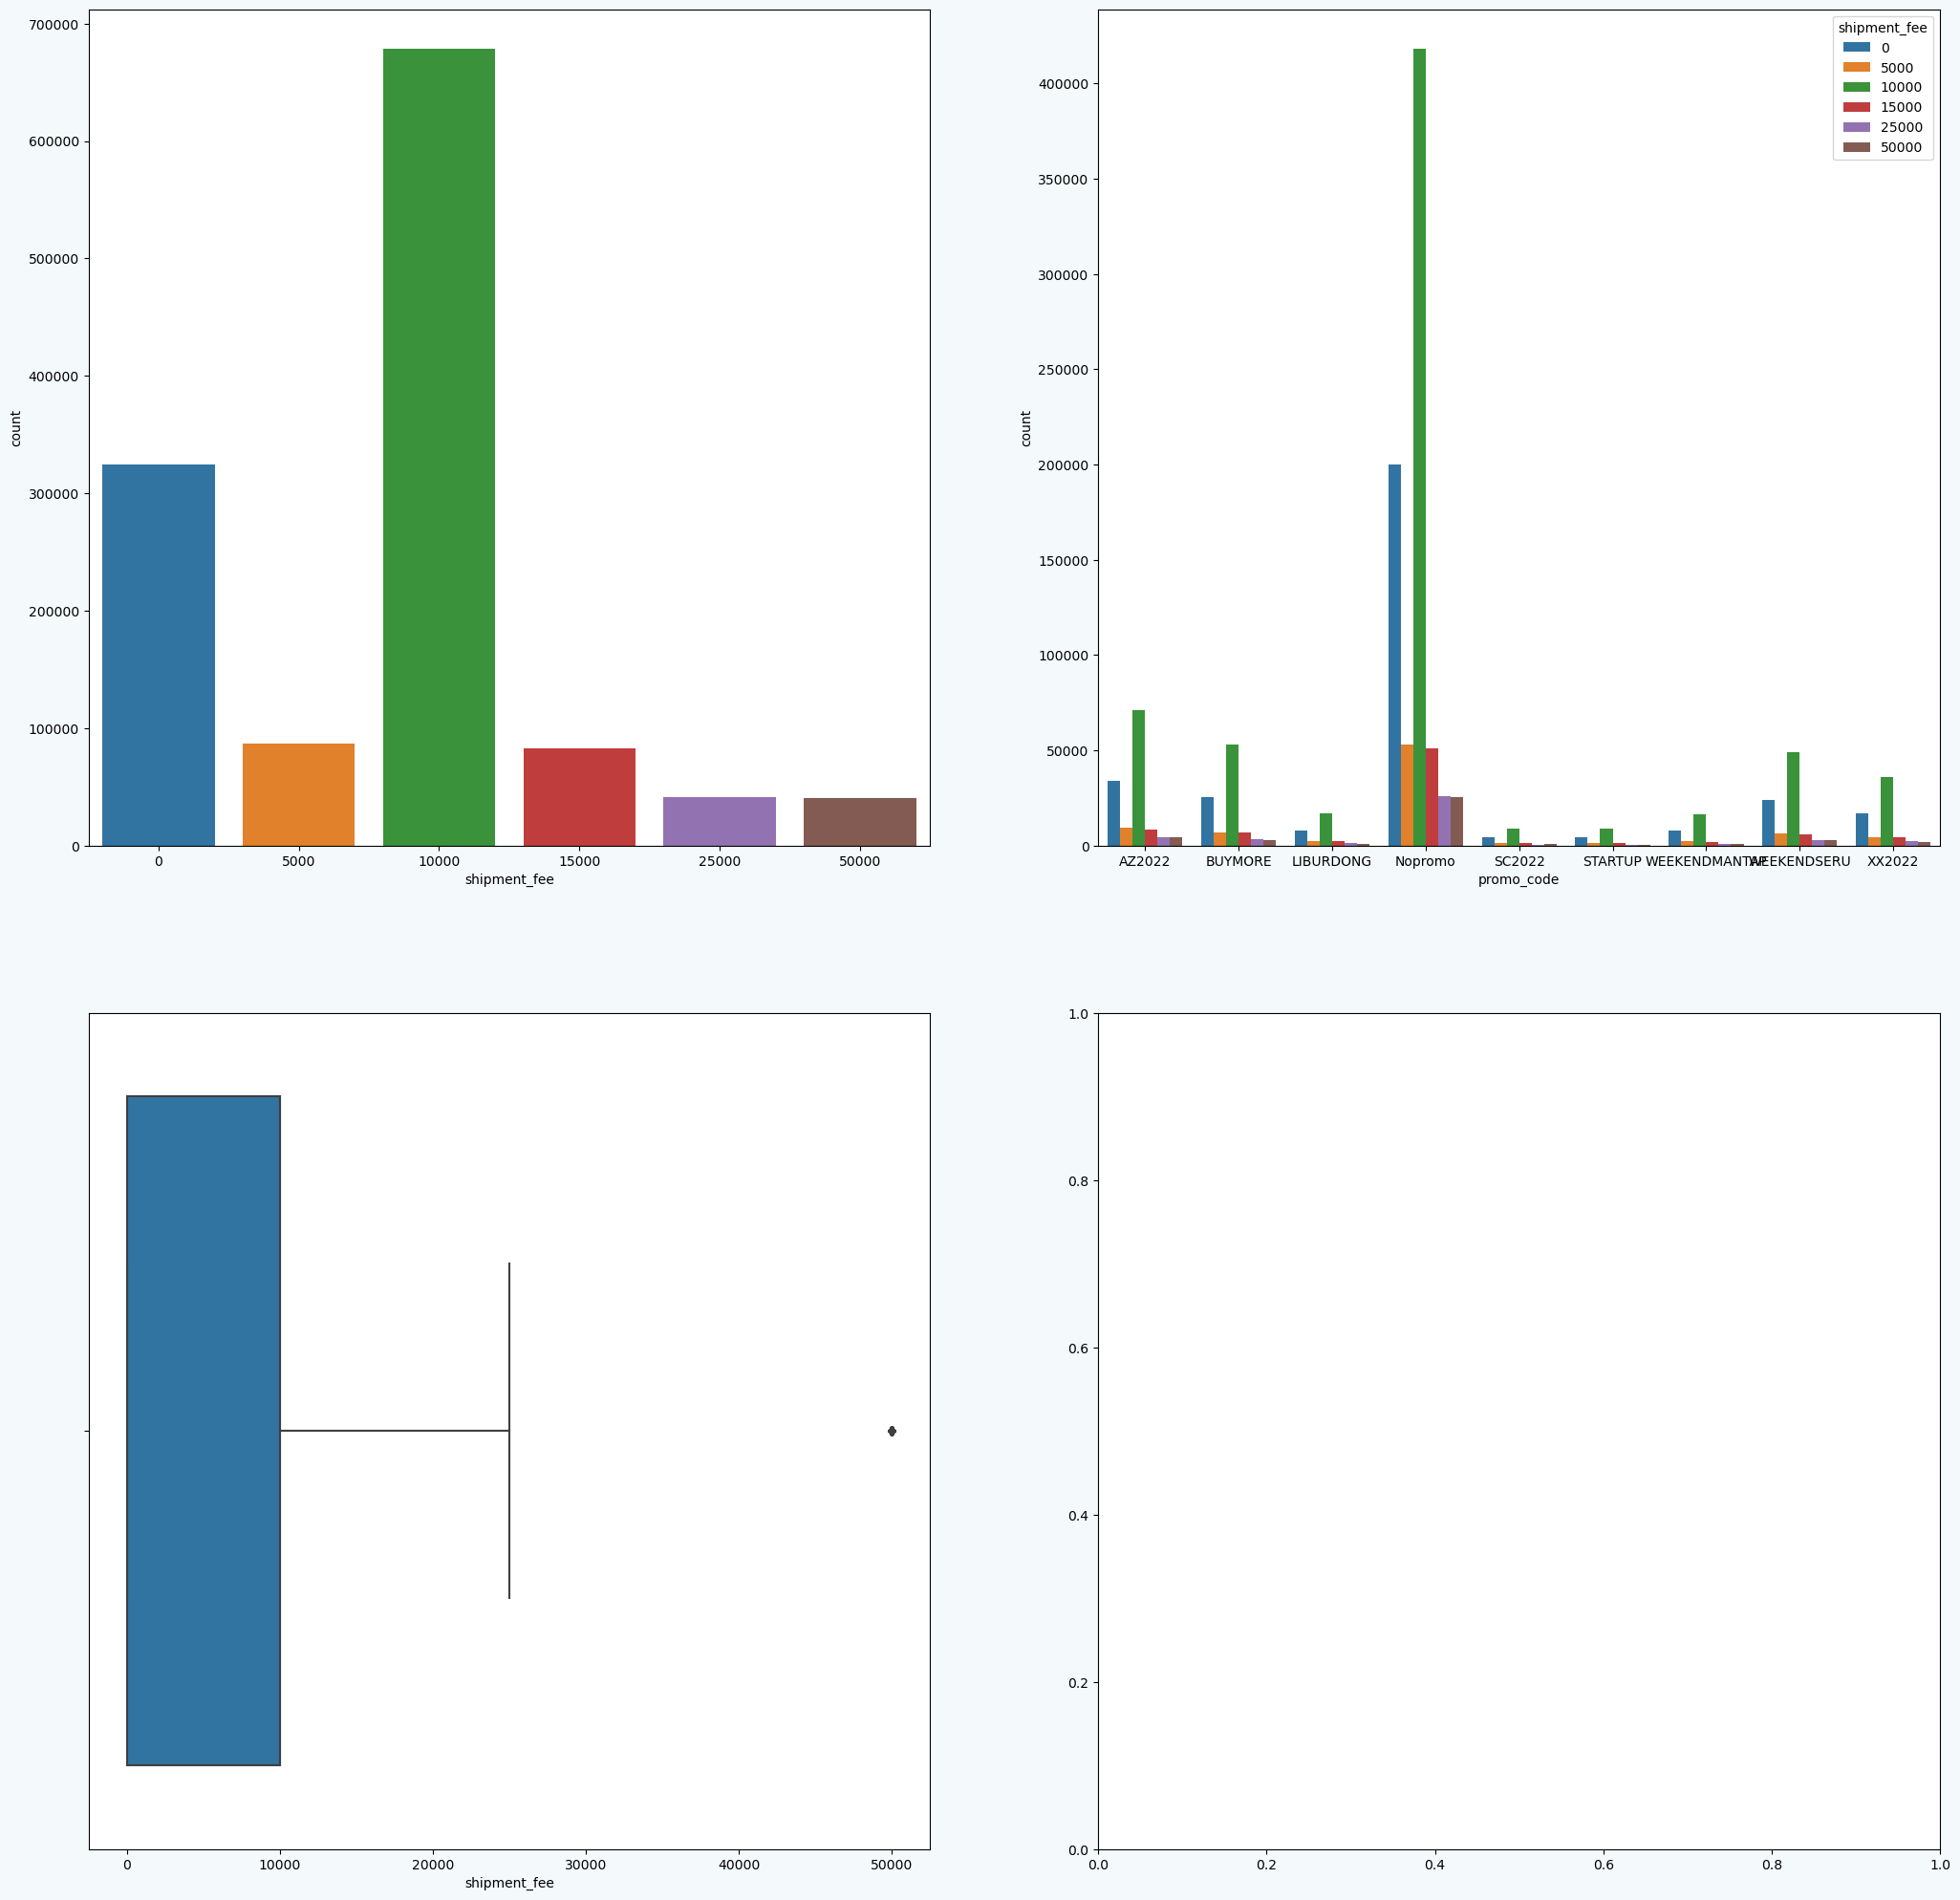

In [39]:
fig, axes = plt.subplots(2,2, figsize=(25, 25), facecolor='#F4F9FC')

# 배송비 분포
sns.countplot(data=transaction_new, x='shipment_fee', ax=axes[0,0])


# 프로모션별 배송비 분포
sns.countplot(data=transaction_new, x='promo_code',hue='shipment_fee', ax=axes[0,1])

# 배송비 boxplot
sns.boxplot(data=transaction_new, x='shipment_fee', ax=axes[1,0])

🅱️ 배송비는 10000인 경우가 많고, 프로모션별 배송비를 조회했을때도 비슷한 추이를 보인다.

#### total_amount

<AxesSubplot:xlabel='total_amount'>

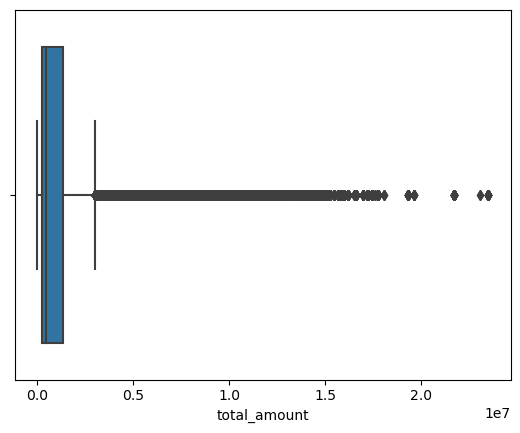

In [40]:
sns.boxplot(data=transaction_new, x='total_amount')

🅱️ 아웃라이어는 처리할 필요가 있어보임   
현재 1.5iqr 사용하여 아웃라이어 처리.   
-> 확인결과 아웃라이어를 제거해버리면 총합은 상관없지만 사용자가 어떤 물건을 샀는지 제대로 파악 X

#### quantity

<AxesSubplot:xlabel='quantity', ylabel='count'>

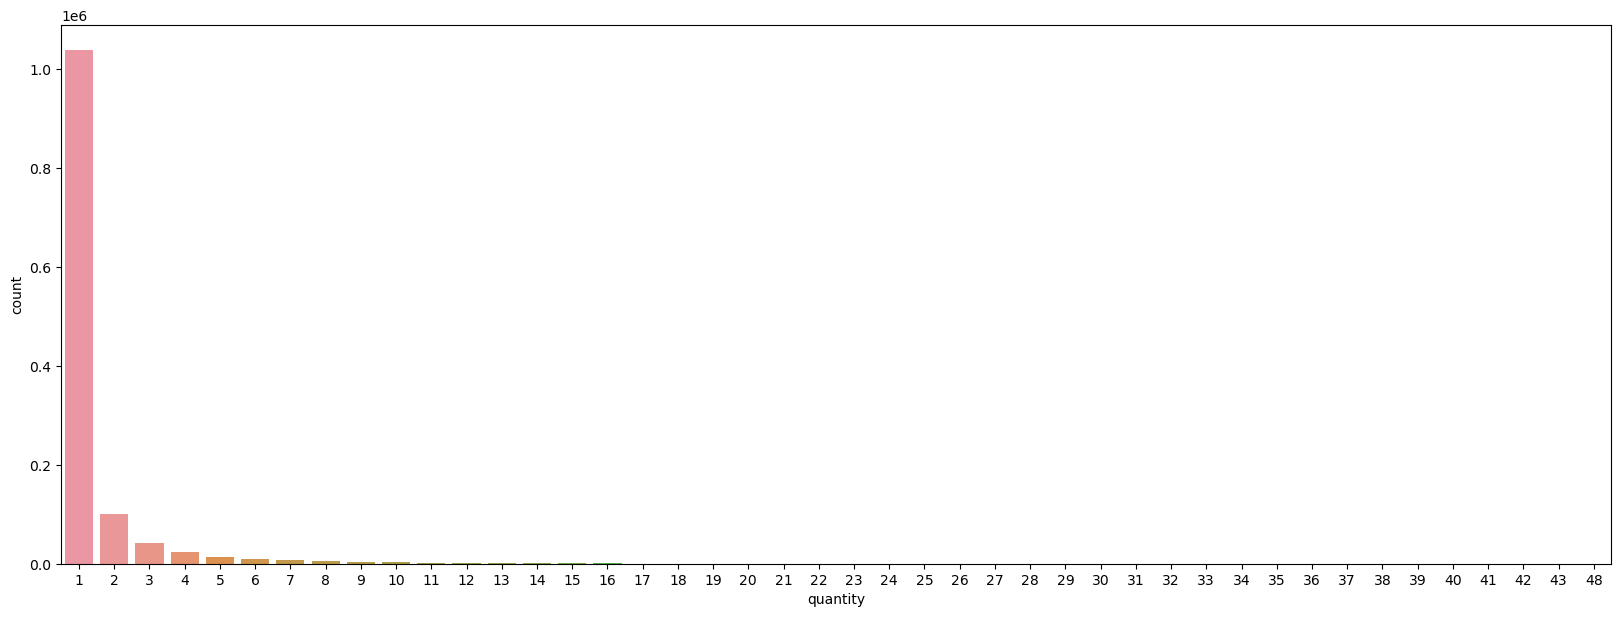

In [41]:
plt.subplots(figsize=(20,7))
sns.countplot(data=transaction_new, x='quantity')

🅱️ 1개 구매한 사람이 가장 많다. 어찌보면 당연한 것이다. 

#### item_price   

<AxesSubplot:xlabel='item_price'>

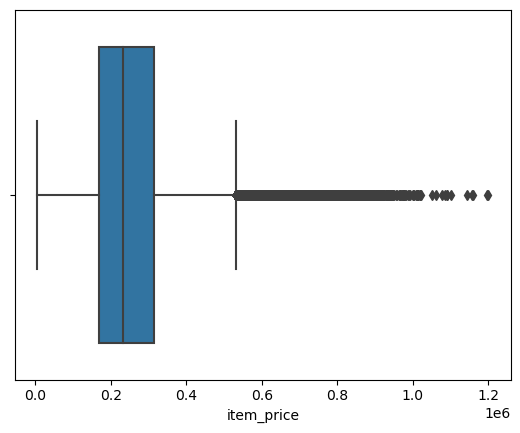

In [42]:
sns.boxplot(data=transaction_new, x='item_price')

🅱️ 아웃라이어는 처리할 필요가 있어보임   
마찬가지로 1.5iqr을 사용해서 아웃라이어 제거   
-> 확인결과 아웃라이어를 제거해버리면 총합은 상관없지만 사용자가 어떤 물건을 샀는지 제대로 파악 X

#### session_id       

🅱️ click_stream 데이터와 transaction 데이터를 조인한다면 transaction 데이터의 경우 대부분 구매를 한 경우에 해당되는 데이터만 있기때문에 만약 조인을 한다면 click_stream의 여러가지 세션들은 의미가 없어진다. 따라서 현재 session_id로만 봤을땐 유의미한 분석이 없을 것으로 판단하여 추후에 다른 방법으로 분석 예정

####  총정리

1. 프로모션에 따른 여러 컬럼들과의 관계에서 유의미한 것들을 찾지 못함.
1. transaction의 경우 구매한 경우가 96%, 비구매가 4%로 구매한 경우가 훨씬 많았음.
1. customer_id가 4774인 경우를 예시로 보면 각 행마다 모두 total_amount값이 같다. 즉 4774가 구매한 제품들을 행마다 입력되어 있고, total_amount은 모두 같은 값으로 기입되어 있다.
따라서 추후에 값에 대한 분석을 진행할 때 이점을 유의하여 분석해야함.

# 💡새로운 테이블 생성 (총정리 3번 내용을 반영하여 날짜별 고객별 구매정보 데이터 생성.)

In [11]:
transaction_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   created_at              1254585 non-null  datetime64[ns]
 1   customer_id             1254585 non-null  int32         
 2   booking_id              1254585 non-null  object        
 3   session_id              1254585 non-null  object        
 4   payment_method          1254585 non-null  category      
 5   payment_status          1254585 non-null  category      
 6   promo_amount            1254585 non-null  int32         
 7   promo_code              481139 non-null   category      
 8   shipment_fee            1254585 non-null  int32         
 9   shipment_date_limit     1254585 non-null  datetime64[ns]
 10  shipment_location_lat   1254585 non-null  float64       
 11  shipment_location_long  1254585 non-null  float64       
 12  total_amount  

In [12]:
transaction_new['shipment_period'] = transaction_new.shipment_date_limit-transaction_new.created_at

transaction_new.drop(columns=['shipment_location_lat','shipment_location_long'],axis=1,inplace=True)

transaction_new.loc[transaction_new['promo_code'].isnull(),'promo_code']='Nopromo'

In [8]:
transaction_new.head(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,shipment_period
0,2018-07-29 15:22:01,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24,199832,54728,1,191247,4 days 13:45:23
1,2018-07-30 12:40:22,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Nopromo,10000,2018-08-03 01:29:03,155526,16193,1,145526,3 days 12:48:41
2,2018-09-15 11:51:17,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Nopromo,10000,2018-09-18 08:41:49,550696,53686,4,135174,2 days 20:50:32
3,2018-11-01 11:23:48,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Nopromo,0,2018-11-05 17:42:27,271012,20228,1,271012,4 days 06:18:39
4,2018-12-18 11:20:30,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Nopromo,0,2018-12-23 17:24:07,198753,55220,1,198753,5 days 06:03:37


In [13]:
transaction1 = transaction_new.groupby(['created_at',
                                           'customer_id']).agg({'promo_amount':'max',
                                                               'shipment_fee':'max',
                                                                'total_amount':'max',
                                                                'quantity':'sum',
                                                                'shipment_period':'max'}).sort_index(ascending=True).reset_index()
transaction2 = transaction_new[['created_at','customer_id','booking_id','session_id',
                               'total_amount', 'promo_code', 'payment_method', 'payment_status']].drop_duplicates()

In [14]:
transaction_final = pd.merge(transaction1,transaction2, on=['created_at','customer_id','total_amount'], how='left')
transaction_final['promo_yesno'] = transaction_final.promo_code.apply(lambda x:'x' if x=='Nopromo' else 'o')
transaction_final['created_at_2'] = transaction_new['created_at'].apply(lambda x: datetime.strftime(x, '%Y-%m'))

In [105]:
transaction_new[transaction_new.customer_id==4774]

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,shipment_period
1,2018-07-30 12:40:22,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Nopromo,10000,2018-08-03 01:29:03,155526,16193,1,145526,3 days 12:48:41
2,2018-09-15 11:51:17,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Nopromo,10000,2018-09-18 08:41:49,550696,53686,4,135174,2 days 20:50:32
3,2018-11-01 11:23:48,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Nopromo,0,2018-11-05 17:42:27,271012,20228,1,271012,4 days 06:18:39
4,2018-12-18 11:20:30,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Nopromo,0,2018-12-23 17:24:07,198753,55220,1,198753,5 days 06:03:37
5,2019-02-03 11:25:55,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07 10:41:59,181865,59620,1,183234,3 days 23:16:04
6,2019-03-22 11:53:02,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Credit Card,Success,0,Nopromo,10000,2019-03-27 14:40:13,306599,53136,1,296599,5 days 02:47:11
7,2019-05-08 11:29:21,4774,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,Credit Card,Success,0,Nopromo,10000,2019-05-10 20:09:58,153913,14142,1,143913,2 days 08:40:37
8,2019-06-24 12:08:52,4774,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,Credit Card,Success,4019,AZ2022,10000,2019-06-28 10:34:36,370757,12282,1,364776,3 days 22:25:44
9,2019-08-10 12:14:24,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14 18:07:04,1295740,53051,1,292052,4 days 05:52:40
10,2019-08-10 12:14:24,4774,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,Credit Card,Success,9072,WEEKENDSERU,10000,2019-08-14 18:07:04,1295740,46352,1,241945,4 days 05:52:40


In [104]:
transaction_final.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,created_at_3
0,2016-06-30 23:18:44,74089,0,10000,640795,3,3 days 18:16:53,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,Nopromo,LinkAja,Success,x,2018-07,2018-07-29
1,2016-07-01 02:53:26,6183,6053,10000,578826,2,5 days 00:12:15,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,XX2022,OVO,Success,o,2018-07,2018-07-30
2,2016-07-01 09:45:51,16228,0,15000,333792,1,2 days 09:24:45,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Nopromo,Debit Card,Success,x,2018-09,2018-09-15
3,2016-07-01 22:32:45,73773,0,10000,256670,1,4 days 17:29:25,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Nopromo,Debit Card,Success,x,2018-11,2018-11-01
4,2016-07-02 05:28:40,37770,0,10000,543010,2,2 days 10:35:54,faa3f7c3-7f2a-40e1-af74-acec3785c63a,df175a0e-f6e4-4d9a-a76a-38976e09ccf1,Nopromo,Credit Card,Success,x,2018-12,2018-12-18


In [155]:
transaction_final.to_csv('transcation_final.csv', index=False)

In [13]:
#  결제성공여부가 success인 경우만 추출해서 프로모션 코드 적용.비적용에 따른 매출 비교

tran_success = transaction_final[transaction_final.payment_status=='Success']
tran_success_g = tran_success.groupby(['created_at_2','promo_yesno'])['total_amount'].sum().reset_index()
tran_success_g.head()

,created_at_2,promo_yesno,total_amount
0,2016-07,o,36829294.00
1,2016-07,x,62045737.00
2,2016-08,o,111706703.00
3,2016-08,x,178319682.00
4,2016-09,o,174205496.00


In [67]:
# 가장 큰 감소가 있는 달은 6월-7월이고, 전월 대비 감소율을 구함.
round(((4477017725-2654963664)+(7785312037-4746752020))/(4477017725+7785312037)*100,2)

39.64

<AxesSubplot:ylabel='promo_yesno'>

findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


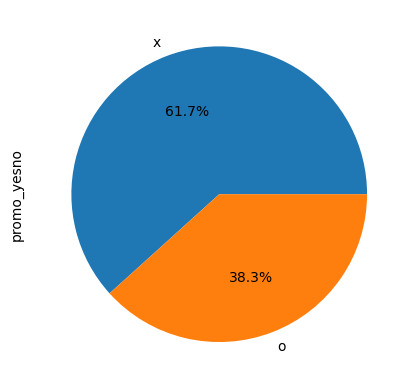

In [14]:
transaction_final.promo_yesno.value_counts(normalize=True).plot.pie( autopct ='%.1f%%')

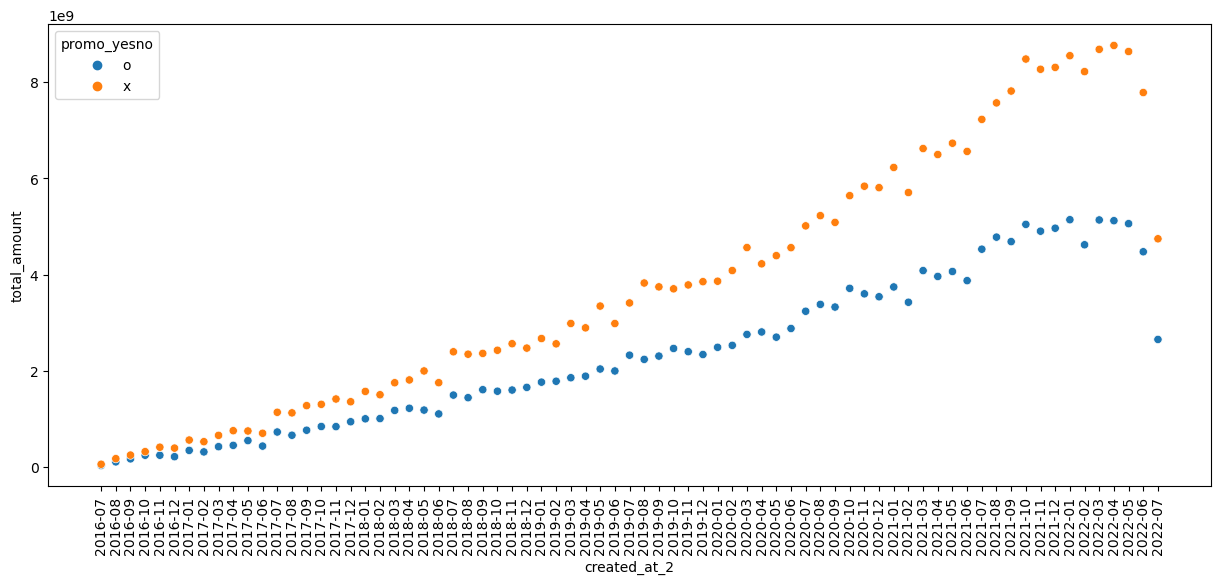

In [15]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=tran_success_g.created_at_2,y=tran_success_g.total_amount,hue=tran_success_g.promo_yesno)
plt.xticks(rotation=90);

In [60]:
tran_success = transaction_final[transaction_final.payment_status=='Success']
tran_success_g = tran_success.groupby(['created_at_2','promo_yesno'])['session_id'].count().reset_index()
tran_success_g.head()

,created_at_2,promo_yesno,session_id
0,2016-07,o,66
1,2016-07,x,129
2,2016-08,o,212
3,2016-08,x,363
4,2016-09,o,310


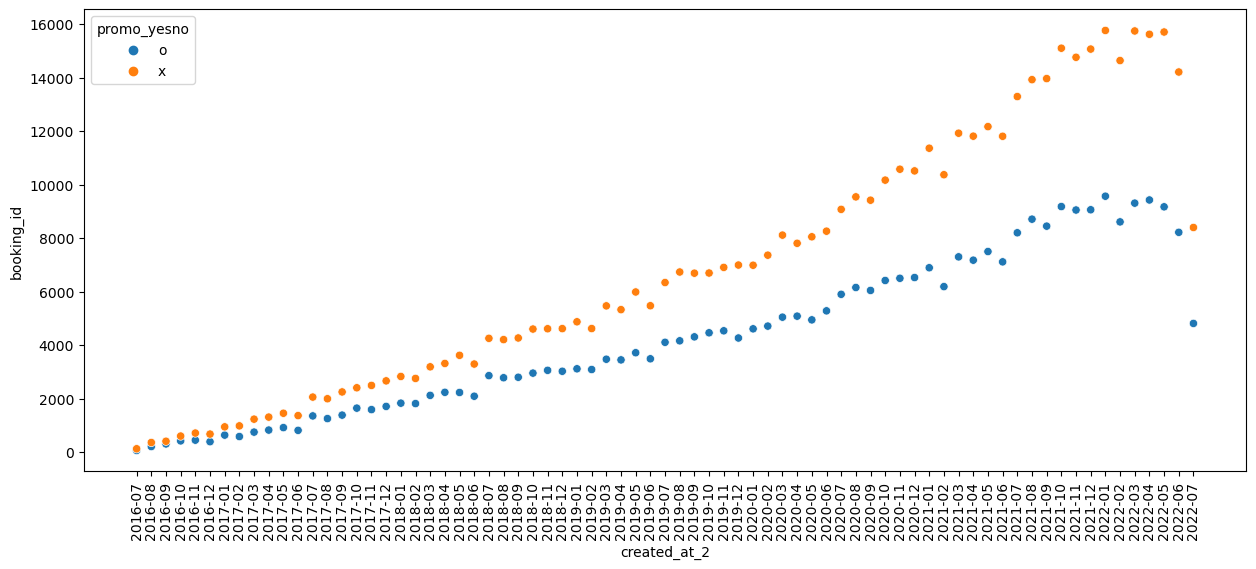

In [74]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=tran_success_g.created_at_2,y=tran_success_g.session_id,hue=tran_success_g.promo_yesno)
plt.xticks(rotation=90);

In [16]:
# 고객데이터 불러오기
customer =  pd.read_csv('data_file/customer.csv')

In [65]:
customer.head()

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.30,115.77,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.98,114.92,Kalimantan Selatan,Indonesia,2021-04-11


In [17]:
# 새로 생성한 transaction데이터와 customer데이터 merge작업
# 구매를 한번도 안한 사람도 파악하기 위해서 customer쪽에 merge진행
tranfinal_cus = pd.merge(transaction_final,customer, on=['customer_id'],how='right')
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,NaT,2870,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,NaT,8193,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23


In [103]:
tranfinal_cus.to_csv('tranfinal_cus.csv', index=False)

In [21]:
# 주문을 했던 고객데이터만 가지고 와서 프로모션 적용. 비적용에 따른 남녀 비율
tranfinal_cus_notnull = tranfinal_cus[(tranfinal_cus.created_at.notnull()&(tranfinal_cus.payment_status=='Success'))].reset_index(drop=True)
tranfinal_cus_notnull.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
1,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
2,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,2020-09-16 13:48:09,7279,0.00,10000.00,412502.00,2.00,3 days 08:50:35,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Nopromo,Debit Card,Success,x,2019-03,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
4,2020-10-02 13:46:24,7279,0.00,0.00,671977.00,2.00,4 days 01:21:50,18f18452-5b14-4b17-8a99-24c2dadd303f,edd6e6c1-066c-4703-a8f6-43ed0ffa3eb5,Nopromo,LinkAja,Success,x,2020-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23


In [22]:
customer.gender.value_counts(normalize=True)

F   0.64
M   0.36
Name: gender, dtype: float64

In [23]:
tranfinal_cus_notnull_1 = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_yesno=='o'].groupby(['created_at_2','gender']).count()['session_id'].reset_index()
tranfinal_cus_notnull_1.head()

,created_at_2,gender,session_id
0,2016-07,F,45
1,2016-07,M,21
2,2016-08,F,127
3,2016-08,M,85
4,2016-09,F,202


In [24]:
tranfinal_cus_notnull_1_no = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_yesno=='x'].groupby(['created_at_2','gender']).count()['booking_id'].reset_index()
tranfinal_cus_notnull_1_no.head()

,created_at_2,gender,booking_id
0,2016-07,F,90
1,2016-07,M,39
2,2016-08,F,236
3,2016-08,M,127
4,2016-09,F,256


findfont: Font family ['NanumSquareNeo/TTF'] not found. Falling back to DejaVu Sans.


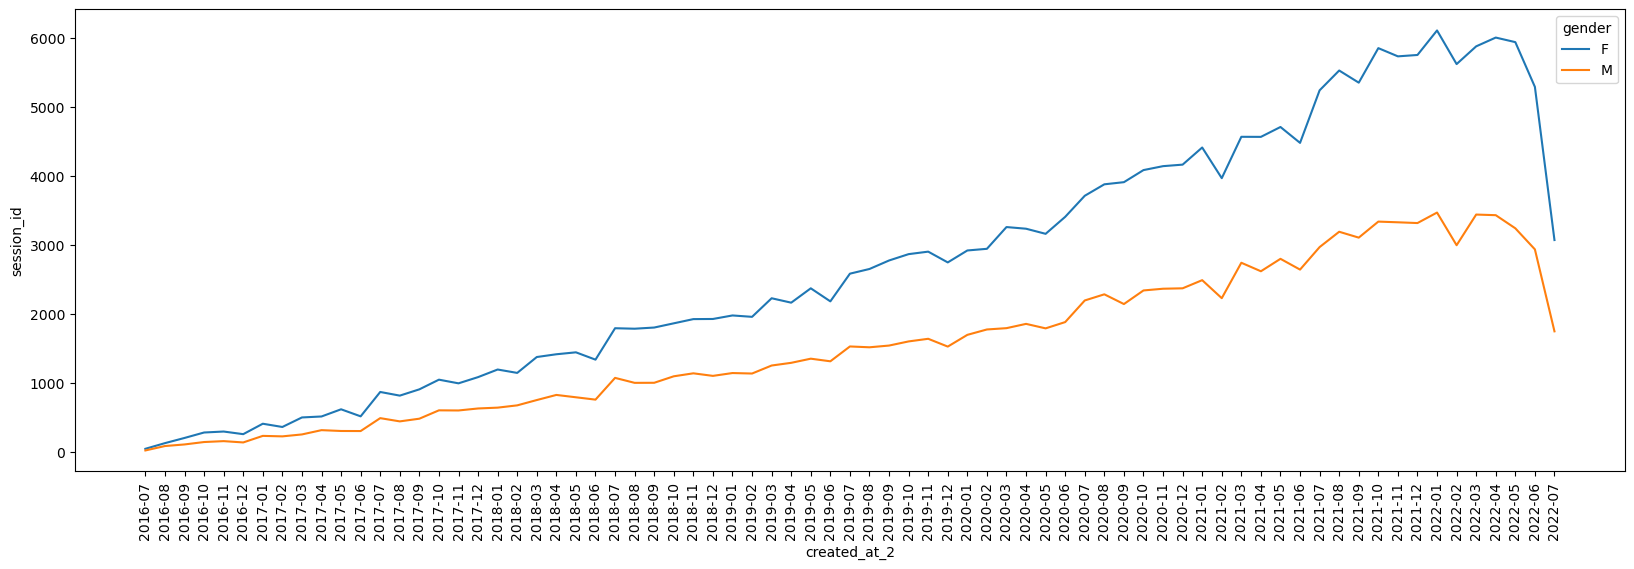

In [28]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=tranfinal_cus_notnull_1.created_at_2,y=tranfinal_cus_notnull_1.session_id,hue=tranfinal_cus_notnull_1.gender)
plt.xticks(rotation=90);

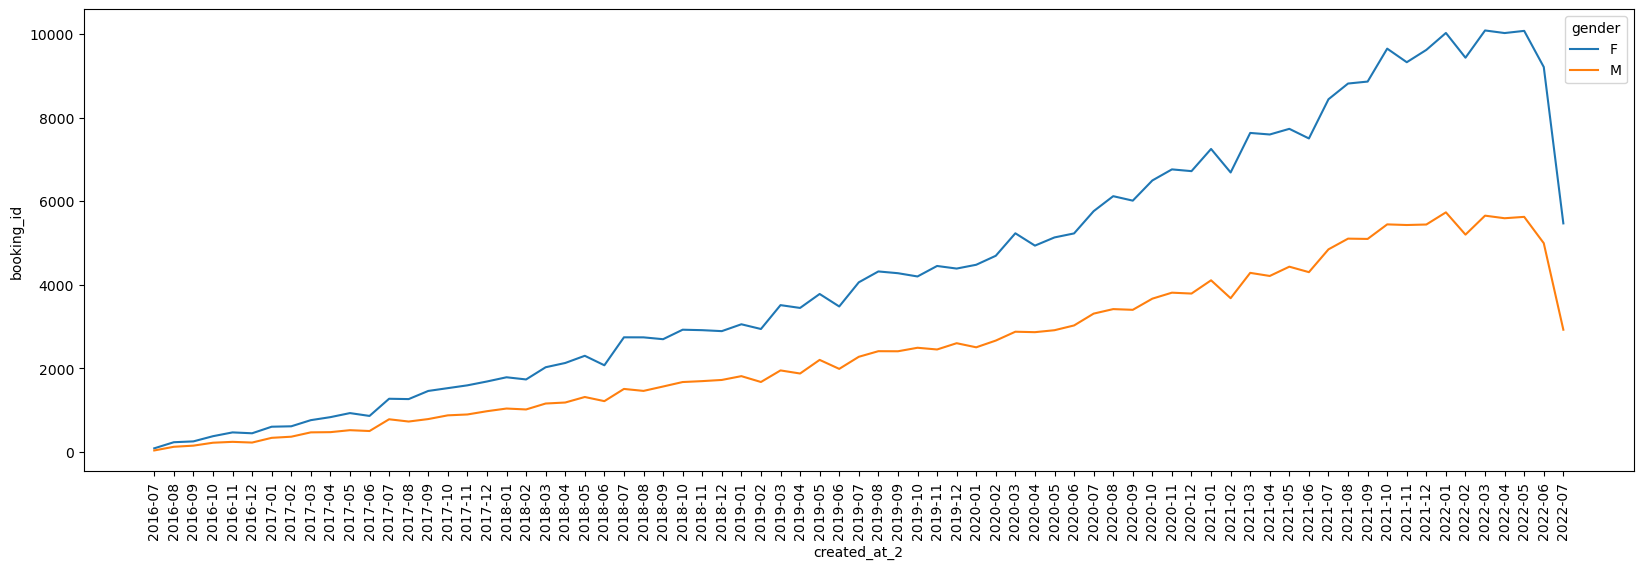

In [29]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=tranfinal_cus_notnull_1_no.created_at_2,y=tranfinal_cus_notnull_1_no.booking_id,hue=tranfinal_cus_notnull_1_no.gender)
plt.xticks(rotation=90);

In [30]:
#프로모션 적용.비적용에 따른 나이대 분포
tranfinal_cus_notnull.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
1,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
2,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,2020-09-16 13:48:09,7279,0.00,10000.00,412502.00,2.00,3 days 08:50:35,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Nopromo,Debit Card,Success,x,2019-03,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
4,2020-10-02 13:46:24,7279,0.00,0.00,671977.00,2.00,4 days 01:21:50,18f18452-5b14-4b17-8a99-24c2dadd303f,edd6e6c1-066c-4703-a8f6-43ed0ffa3eb5,Nopromo,LinkAja,Success,x,2020-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23


In [31]:
# 생일 컬럼 datetime으로 데이터 타입 변환.
columns_datetype_change(tranfinal_cus_notnull,'birthdate','datetime64')

In [32]:
# 고객의 나이 컬럼 생성.
from datetime import datetime
current_date = datetime.now().date()
tranfinal_cus_notnull['age'] = (current_date - tranfinal_cus_notnull['birthdate'].dt.date).dt.days // 365
tranfinal_cus_notnull['age2'] = tranfinal_cus_notnull['age'].apply(lambda x : (x // 10) *10)

In [33]:
tranfinal_cus_notnull.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,age,age2
0,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,34,30
1,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,34,30
2,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,34,30
3,2020-09-16 13:48:09,7279,0.00,10000.00,412502.00,2.00,3 days 08:50:35,d8c8337c-ef09-4ed3-801a-3e5fd22c3d8d,70d1c010-60e4-440a-80df-9efb0132cfb7,Nopromo,Debit Card,Success,x,2019-03,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,34,30
4,2020-10-02 13:46:24,7279,0.00,0.00,671977.00,2.00,4 days 01:21:50,18f18452-5b14-4b17-8a99-24c2dadd303f,edd6e6c1-066c-4703-a8f6-43ed0ffa3eb5,Nopromo,LinkAja,Success,x,2020-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,34,30


<AxesSubplot:xlabel='age2', ylabel='session_id'>

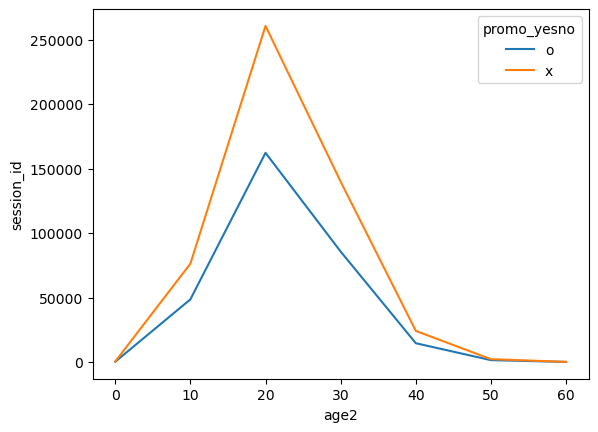

In [34]:
# 프로모션 적용여부에 따른 나이대
data_o = tranfinal_cus_notnull.groupby(['promo_yesno','age2']).count()['session_id'].reset_index()

sns.lineplot(data=data_o ,x='age2',y='session_id',hue='promo_yesno')

In [35]:
# 주문을 했던 고객들의 데이터만 가지고 와서 프로모션적용한 사람의 나이대분포
data = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_code!='Nopromo'].groupby(['customer_id']).max()[['gender','age2']].reset_index()

In [55]:
data_promoyes = data.groupby(['age2'])['customer_id'].count()
# data_promoyes['percent'] = data_promoyes['customer_id'].apply(lambda x: x/data_promoyes['customer_id'].sum()*100)
data_promoyes

age2
0        26
10     5689
20    19887
30    10755
40     1841
50      178
60       13
Name: customer_id, dtype: int64

In [45]:
data2 = tranfinal_cus_notnull[tranfinal_cus_notnull.promo_code=='Nopromo'].groupby(['customer_id']).max()[['gender','age2']].reset_index()

In [56]:
data_promono = data2.groupby(['age2'])['customer_id'].count()
# data_promono['percent'] = data_promono['customer_id'].apply(lambda x: x/data_promono['customer_id'].sum()*100)
data_promono

age2
0        25
10     6717
20    23537
30    12709
40     2217
50      200
60       15
Name: customer_id, dtype: int64

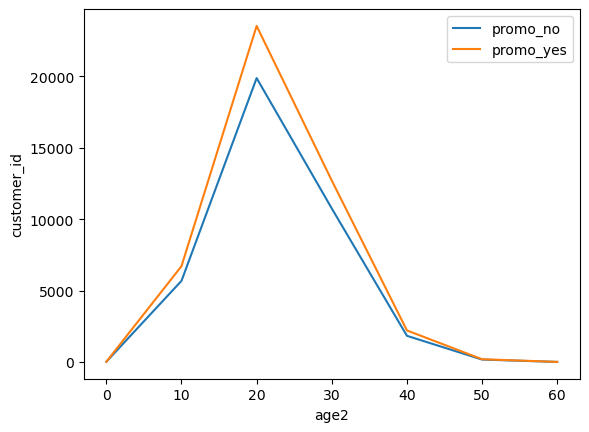

In [57]:
sns.lineplot(data=data_promoyes)
sns.lineplot(data=data_promono)
plt.legend(['promo_no','promo_yes'])

In [158]:
# 지금까지 구매를 1번만 한 사람
tran_rebuy = tranfinal_cus[tranfinal_cus['payment_status']!='Failed'].groupby('customer_id')['session_id'].count().reset_index()
tran_rebuy_fail = tranfinal_cus[tranfinal_cus['payment_status']=='Failed'].groupby('customer_id')['session_id'].count().reset_index()
print('전체기간 0회 구매 : ',tran_rebuy[tran_rebuy.session_id == 0].shape[0])
print('전체기간 1회 구매 : ',tran_rebuy[tran_rebuy.session_id == 1].shape[0],' / 퍼센트 : ', tran_rebuy[tran_rebuy.session_id == 1].shape[0]/tran_rebuy.shape[0] * 100)
print('전체기간 1~5회 구매 : ',tran_rebuy[(tran_rebuy.session_id <= 5)&(tran_rebuy.session_id > 0)].shape[0])
print('전체기간 6~10회 구매 : ',tran_rebuy[(tran_rebuy.session_id > 5) & (tran_rebuy.session_id <=10)].shape[0])
print('전체기간 11~15회 구매 : ',tran_rebuy[(tran_rebuy.session_id > 10) & (tran_rebuy.session_id <=15)].shape[0])
print('전체기간 16~20회 구매 : ',tran_rebuy[(tran_rebuy.session_id > 15) & (tran_rebuy.session_id <=20)].shape[0])
print('전체기간 21회 이상 구매 : ',tran_rebuy[(tran_rebuy.session_id > 20)].shape[0])
print('--------------------------------------------')
# 전체기간의 비활성 고객 비율
print('⭐전체기간 0회구매 비율(비활성 고객 비율) : ',round(tran_rebuy[tran_rebuy.session_id == 0].shape[0] / tran_rebuy.shape[0] * 100,2))
# 전체 기간의 재구매율
tran_rebuy2 = tran_rebuy[tran_rebuy.session_id >= 1]
tran_rebuy3 = tran_rebuy2[tran_rebuy2.session_id > 1]
print('⭐전체기간 재구매율(1회 구매한 고객 중 재구매한 고객수/1번이라도 구매한 고객수) : ',round(tran_rebuy3.shape[0]/tran_rebuy2.shape[0]*100,2))


전체기간 0회 구매 :  49295
전체기간 1회 구매 :  10263  / 퍼센트 :  10.310738720274873
전체기간 1~5회 구매 :  24692
전체기간 6~10회 구매 :  7446
전체기간 11~15회 구매 :  4237
전체기간 16~20회 구매 :  2855
전체기간 21회 이상 구매 :  11012
--------------------------------------------
⭐전체기간 0회구매 비율(비활성 고객 비율) :  49.52
⭐전체기간 재구매율(1회 구매한 고객 중 재구매한 고객수/1번이라도 구매한 고객수) :  79.57


In [135]:
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,NaT,2870,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21
1,NaT,8193,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23


In [151]:
tranfinal_cus.payment_status.value_counts()

Success    815964
Failed      36620
Name: payment_status, dtype: int64

In [58]:
# #구매횟수에 따른 재구매율과 고객비활성화
# tran_rebuy = tranfinal_cus.groupby('customer_id')['session_id'].count().reset_index()
# # 2022년도에 신규회원가입 후 구매 한번도 안한사람
# tran_zerobuy = tranfinal_cus[(tranfinal_cus.first_join_date.dt.year==2022)&(tranfinal_cus.created_at.isnull())]   #8448

# # 
# #tran_rebuy_2022_fail = tranfinal_cus[(tranfinal_cus.created_at.dt.year==2022)&(tranfinal_cus.payment_status=='Failed')].groupby('customer_id')['session_id'].count().reset_index()
# # 2022년도에 1번이상 구매한 사람
# tran_rebuy_2022 = tranfinal_cus[(tranfinal_cus.created_at.dt.year==2022)&(tranfinal_cus.payment_status!='Failed')].groupby('customer_id')['session_id'].count().reset_index()

# # 2022년도에 비활성 고객 비율
# print('⭐2022년도에 0회구매 비율(비활성 고객 비율) : ',round(tran_zerobuy.shape[0] / (tran_rebuy_2022.shape[0]+tran_zerobuy.shape[0]) * 100,2))

# # 2022년도에 재구매율
# tran_rebuy2_ = tran_rebuy_2022[tran_rebuy_2022.session_id >= 1]
# tran_rebuy3 = tran_rebuy2[tran_rebuy2.session_id > 1]
# print('⭐전체기간 재구매율(1회 구매한 고객 중 재구매한 고객수/1번이라도 구매한 고객수) : ',round(tran_rebuy3.shape[0]/tran_rebuy2.shape[0]*100,2))


In [65]:
columns_datetype_change(tranfinal_cus,'first_join_date','datetime64')

In [79]:
transaction_final['created_at_3'] = transaction_new['created_at'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [94]:
transaction_final.head()


,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,created_at_3
0,2016-06-30 23:18:44,74089,0,10000,640795,3,3 days 18:16:53,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,Nopromo,LinkAja,Success,x,2018-07,2018-07-29
1,2016-07-01 02:53:26,6183,6053,10000,578826,2,5 days 00:12:15,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,XX2022,OVO,Success,o,2018-07,2018-07-30
2,2016-07-01 09:45:51,16228,0,15000,333792,1,2 days 09:24:45,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Nopromo,Debit Card,Success,x,2018-09,2018-09-15
3,2016-07-01 22:32:45,73773,0,10000,256670,1,4 days 17:29:25,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Nopromo,Debit Card,Success,x,2018-11,2018-11-01
4,2016-07-02 05:28:40,37770,0,10000,543010,2,2 days 10:35:54,faa3f7c3-7f2a-40e1-af74-acec3785c63a,df175a0e-f6e4-4d9a-a76a-38976e09ccf1,Nopromo,Credit Card,Success,x,2018-12,2018-12-18


In [101]:
# 프로모션을 사용한 경우의 요일별 사용량
new_transaction = transaction_final[transaction_final.promo_yesno=='o'].groupby('created_at_3')['promo_yesno'].count().reset_index()
columns_datetype_change(new_transaction,'created_at_3','datetime64')
new_transaction['weekday'] = new_transaction['created_at_3'].dt.day_name()
new_transaction.groupby('weekday').count()['promo_yesno'].reset_index()

,weekday,promo_yesno
0,Friday,313
1,Monday,316
2,Saturday,314
3,Sunday,317
4,Thursday,317
5,Tuesday,315
6,Wednesday,313


In [102]:
new_transaction = transaction_final[transaction_final.promo_yesno=='x'].groupby('created_at_3')['promo_yesno'].count().reset_index()
columns_datetype_change(new_transaction,'created_at_3','datetime64')
new_transaction['weekday'] = new_transaction['created_at_3'].dt.day_name()
new_transaction.groupby('weekday').count()['promo_yesno'].reset_index()

,weekday,promo_yesno
0,Friday,313
1,Monday,316
2,Saturday,314
3,Sunday,317
4,Thursday,316
5,Tuesday,317
6,Wednesday,314


In [88]:
new_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   created_at_3  5 non-null      object
 1   promo_yesno   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [83]:
new_transaction['weekday'] = new_transaction['created_at_3'].dt.weekday

AttributeError: Can only use .dt accessor with datetimelike values

In [68]:
tranfinal_cus['가입 후 첫구매까지의 기간'] = (tranfinal_cus['created_at'] - tranfinal_cus['first_join_date']).dt.days.fillna(-1)
# tranfinal_cus['가입 후 첫구매까지의 기간'] = tranfinal_cus['가입 후 첫구매까지의 기간'].apply(lambda x: pd.Timedelta(x).days)

In [69]:
tranfinal_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,가입 후 첫구매까지의 기간
0,NaT,2870,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.04,101.36,Sumatera Barat,Indonesia,2019-07-21,-1.00
1,NaT,8193,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.21,106.82,Jakarta Raya,Indonesia,2017-07-16,-1.00
2,2020-08-23 12:53:12,7279,2853.00,15000.00,844751.00,3.00,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,0.00
3,2020-08-31 13:34:59,7279,0.00,10000.00,391341.00,1.00,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,8.00
4,2020-09-08 13:38:30,7279,0.00,0.00,154220.00,1.00,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.63,116.43,Nusa Tenggara Barat,Indonesia,2020-08-23,16.00


In [77]:
transaction_final.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2
0,2016-06-30 23:18:44,74089,0,10000,640795,3,3 days 18:16:53,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,Nopromo,LinkAja,Success,x,2018-07
1,2016-07-01 02:53:26,6183,6053,10000,578826,2,5 days 00:12:15,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,XX2022,OVO,Success,o,2018-07
2,2016-07-01 09:45:51,16228,0,15000,333792,1,2 days 09:24:45,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Nopromo,Debit Card,Success,x,2018-09
3,2016-07-01 22:32:45,73773,0,10000,256670,1,4 days 17:29:25,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Nopromo,Debit Card,Success,x,2018-11
4,2016-07-02 05:28:40,37770,0,10000,543010,2,2 days 10:35:54,faa3f7c3-7f2a-40e1-af74-acec3785c63a,df175a0e-f6e4-4d9a-a76a-38976e09ccf1,Nopromo,Credit Card,Success,x,2018-12


In [76]:
transaction_final.groupby([transaction_final['created_at'].dt.year,transaction_final['created_at'].dt.month,transaction_final['created_at'].dt.day]).count()['payment_status'].reset_index()[:10]

ValueError: cannot insert created_at, already exists

<AxesSubplot:xlabel='가입 후 첫구매까지의 기간'>

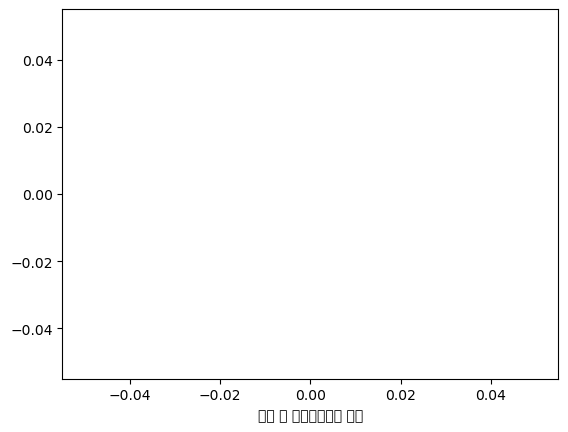

In [71]:
sns.lineplot(tranfinal_cus['가입 후 첫구매까지의 기간'])